Import Lib

In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal
import math

#### 1. State

In [2]:
class quadraticEquationState(TypedDict):
  a:int
  b:int
  c:int
  equation:str
  discriminant:float
  result:str

##### Defining the function

In [3]:
def showEquation(state:quadraticEquationState)->quadraticEquationState:
  equation = f"{state['a']}x2 + {state['b']}x + {state['c']}"

  return {'equation':equation} 

In [4]:
def calculateDiscriminat(state:quadraticEquationState)->quadraticEquationState:
  discriminant = state['b']**2 - (4*state['a']*state['c'])

  return {'discriminant':discriminant}

In [5]:
def realRoots(state:quadraticEquationState)->quadraticEquationState:
  root1 = ((-state['b'] + math.sqrt(state['discriminant'])) / (2*state['a']))
  root2 = ((-state['b'] - math.sqrt(state['discriminant'])) / (2*state['a']))

  result = f'The roots are {root1} and {root2}'
  return {'result':result}

In [6]:
def sameRoot(state:quadraticEquationState)->quadraticEquationState:
  root1 = (-state['b'] / 2*state['a'])

  result = f'The roots are {root1} and {root1}'
  return {'result':result}

In [7]:
def noRealRoots(state:quadraticEquationState)->quadraticEquationState:

  result = f'No real roots , both will be Imgainary roots'
  return {'result':result}

condition function - a function which have another function output

In [8]:
def checkCondition(state:quadraticEquationState)->Literal["realRoots", "sameRoot", "noRealRoots"]:

  if state['discriminant'] > 0:
    return "realRoots"
  elif state["discriminant"] == 0:
    return "sameRoot"
  else:
    return "noRealRoots"

#### 2. Graph

##### 2.1 Declare the Graph

In [9]:
graph = StateGraph(quadraticEquationState)

graph.add_node('showEquation', showEquation)
graph.add_node('calculateDiscriminat', calculateDiscriminat)
graph.add_node('realRoots',realRoots)
graph.add_node('sameRoot', sameRoot)
graph.add_node('noRealRoots', noRealRoots)

graph.add_edge(START, 'showEquation')
graph.add_edge('showEquation', 'calculateDiscriminat')

# condition 
graph.add_conditional_edges('calculateDiscriminat', checkCondition)
graph.add_edge('realRoots', END)
graph.add_edge('sameRoot', END)
graph.add_edge('noRealRoots', END)

workflow = graph.compile()

##### 2.2 show the Workflow

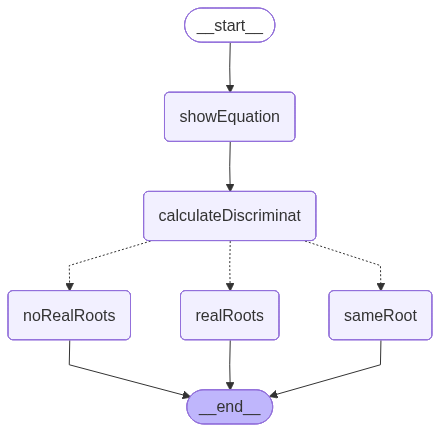

In [10]:
workflow

#####

##### 2.3 Execute the Workflow

In [13]:
initalState = {
  'a':4,
  'b':5,
  'c':-4
}

workflow.invoke(initalState)

{'a': 4,
 'b': 5,
 'c': -4,
 'equation': '4x2 + 5x + -4',
 'discriminant': 89,
 'result': 'The roots are 0.5542476415070754 and -1.8042476415070754'}